In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/healthcare_dataset.csv')

In [ ]:
df.head()

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,29228.55368,6902.381289,5514.435910
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,23924.98059,6809.799325,5791.920242
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,49186.95644,13614.616130,12415.825360
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,30371.27399,8037.269492,6858.689088
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,62346,23300.06199,5762.881821,4508.202659


In [ ]:
df.describe()

,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,100.000000,100.000000,100.000000,100.000000
mean,75531.110000,39166.125138,10609.272564,9316.333146
std,66114.003491,28305.922794,7927.608642,7553.518367
min,25082.000000,14999.962210,3964.390440,2852.370384
25%,32504.000000,21090.618125,5721.026203,4598.390430
50%,49012.500000,29085.652745,7843.146381,6559.593476
75%,98344.750000,48225.998210,12605.957745,11577.938568
max,428495.000000,158866.837900,44763.505530,42281.292900


In [ ]:
df.columns

Index(['DRG Definition', 'Total Discharges', 'Average Covered Charges',
       'Average Total Payments', 'Average Medicare Payments'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DRG Definition             100 non-null    object 
 1   Total Discharges           100 non-null    int64  
 2   Average Covered Charges    100 non-null    float64
 3   Average Total Payments     100 non-null    float64
 4   Average Medicare Payments  100 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
df.isnull().sum()

,0
DRG Definition,0
Total Discharges,0
Average Covered Charges,0
Average Total Payments,0
Average Medicare Payments,0


In [ ]:
filtered_df = df[df['Average Total Payments'] < 5000]
#i have used this data for better visualization

In [ ]:
grouped_df = filtered_df.groupby('DRG Definition').agg({'Average Total Payments': 'mean',}).reset_index()

In [ ]:
print(grouped_df)

                                       DRG Definition  Average Total Payments
0                                149 - DYSEQUILIBRIUM             4602.074790
1   192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/...             4946.067635
2        195 - SIMPLE PNEUMONIA & PLEURISY W/O CC/MCC             4850.172109
3                203 - BRONCHITIS & ASTHMA W/O CC/MCC             4395.523132
4              293 - HEART FAILURE & SHOCK W/O CC/MCC             4741.807604
5      301 - PERIPHERAL VASCULAR DISORDERS W/O CC/MCC             4618.704924
6                       303 - ATHEROSCLEROSIS W/O MCC             4134.833013
7                          305 - HYPERTENSION W/O MCC             4421.070049
8   310 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDER...             3964.390440
9                                    313 - CHEST PAIN             4009.063294
10                  390 - G.I. OBSTRUCTION W/O CC/MCC             4492.435915
11            536 - FRACTURES OF HIP & PELVIS W/O MCC           

<ipython-input-65-161a2eaaf5b2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(labels=grouped_df["DRG Definition"], rotation=90)


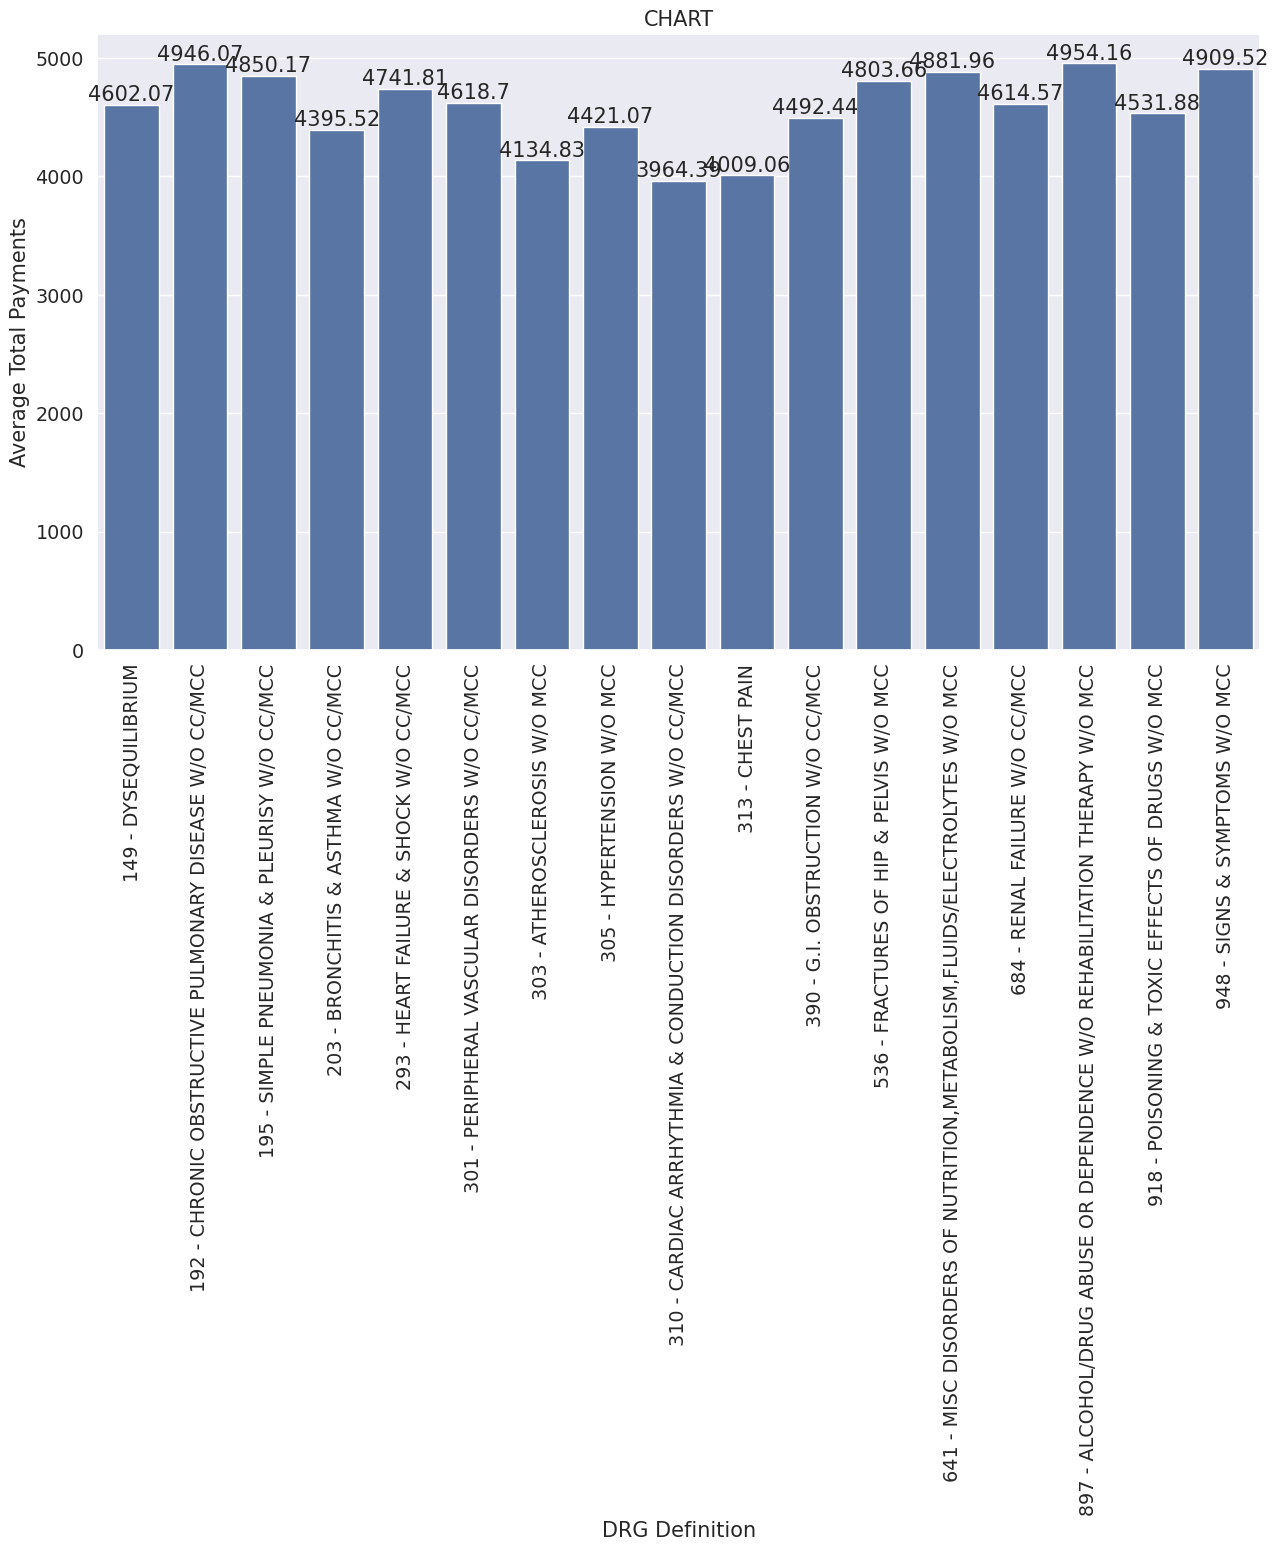

In [ ]:
##### a bar plot , plotted from grouped df which contains definition and average payments ####
matplotlib.rcParams['figure.figsize'] = (15, 8)
colors = sns.color_palette("husl", len(grouped_df))
p = sns.barplot(x='DRG Definition',y='Average Total Payments',data =grouped_df )
p.bar_label(p.containers[0])
plt.title("CHART")
p.set_xticklabels(labels=grouped_df["DRG Definition"], rotation=90)
sns.set(font_scale=1.25)
plt.show()

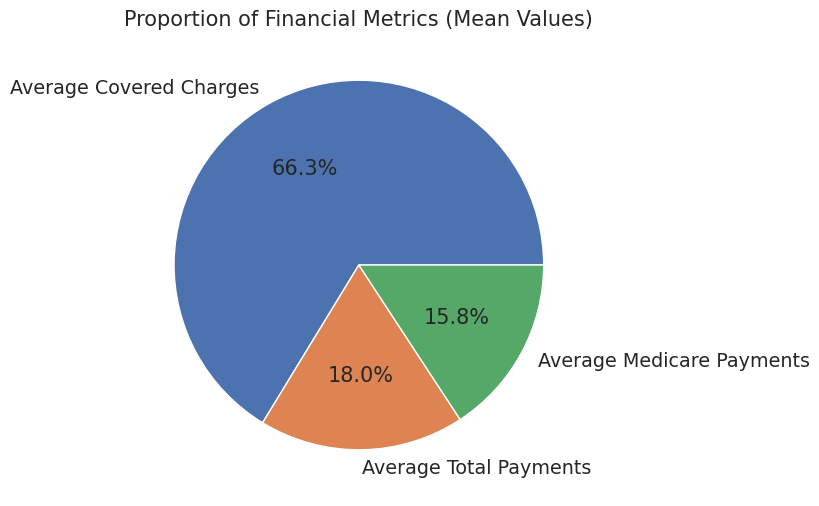

In [ ]:
### Pie Ploted ###
### taken the mean values for plotting ###
matplotlib.rcParams['figure.figsize'] = (12,6)
labels_new = ['Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']
mean_values = [39166.125138, 10609.272564, 9316.333146]
plt.pie(mean_values, labels=labels_new, autopct='%1.1f%%')
plt.title('Proportion of Financial Metrics (Mean Values)')
plt.show()


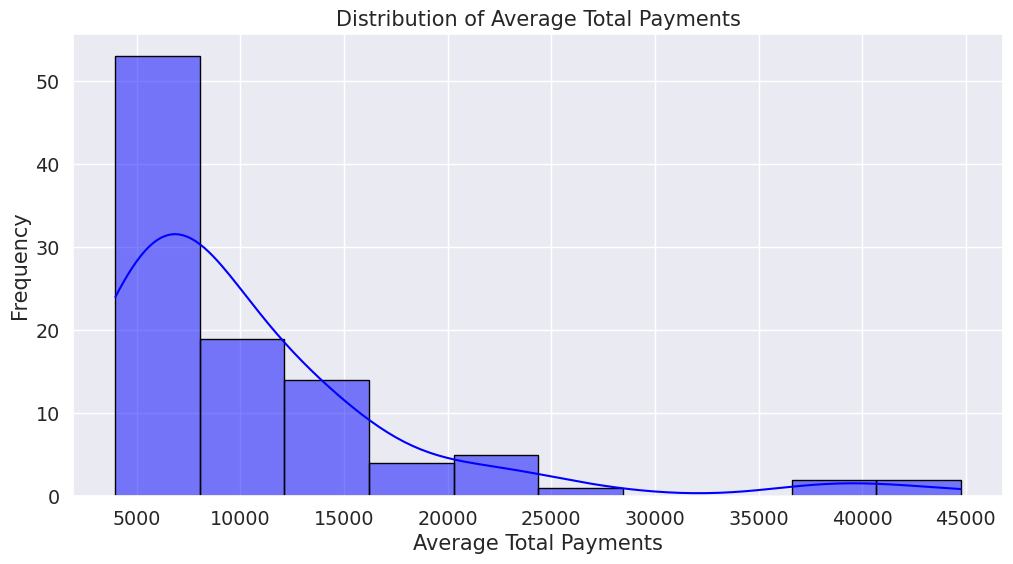

In [ ]:
#### Histogram ####
### Entire average total payment taken at here  ###
plt.figure(figsize=(12, 6))
sns.histplot(df['Average Total Payments'], bins=10, color='blue', edgecolor='black', kde=True)
#sns.histplot(df['Total Discharges'], bins=10, color='green', edgecolor='black', kde=True)
plt.title('Distribution of Average Total Payments')
plt.xlabel('Average Total Payments')
plt.ylabel('Frequency')
plt.show()


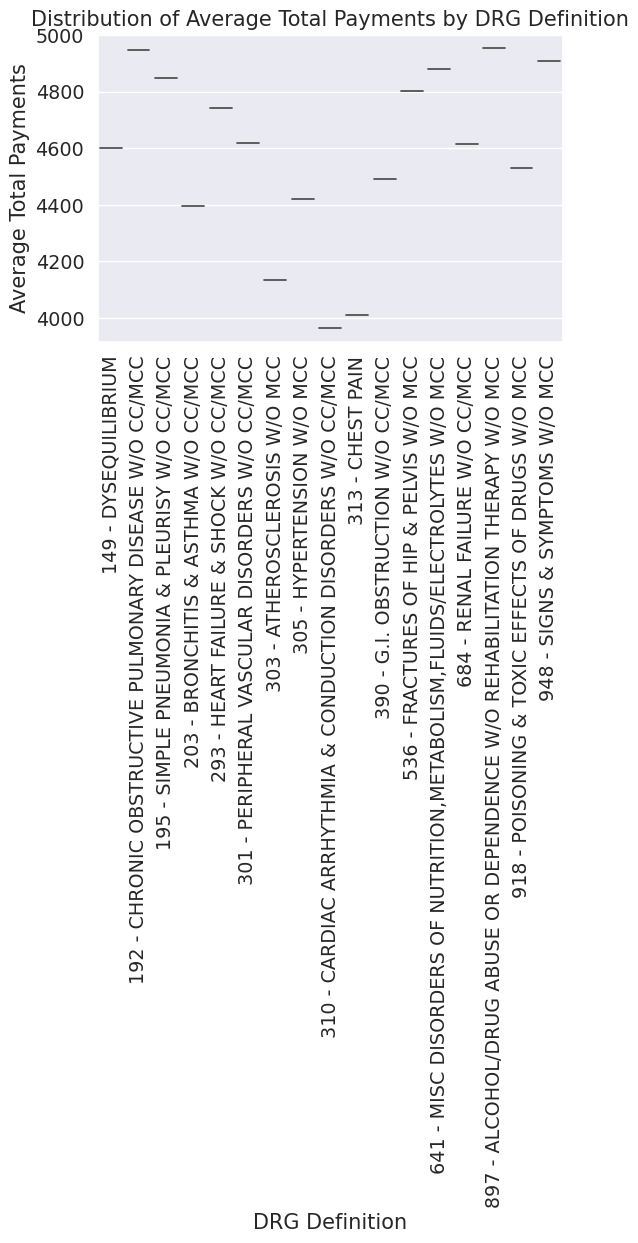

In [ ]:
######  violin plot ########
plt.figure(figsize=(6, 4))
sns.violinplot(x='DRG Definition', y='Average Total Payments', data=grouped_df, inner='quartile')
plt.title('Distribution of Average Total Payments by DRG Definition')
plt.xticks(rotation=90)
plt.xlabel('DRG Definition')
plt.ylabel('Average Total Payments')
plt.show()


<Figure size 1500x1000 with 0 Axes>

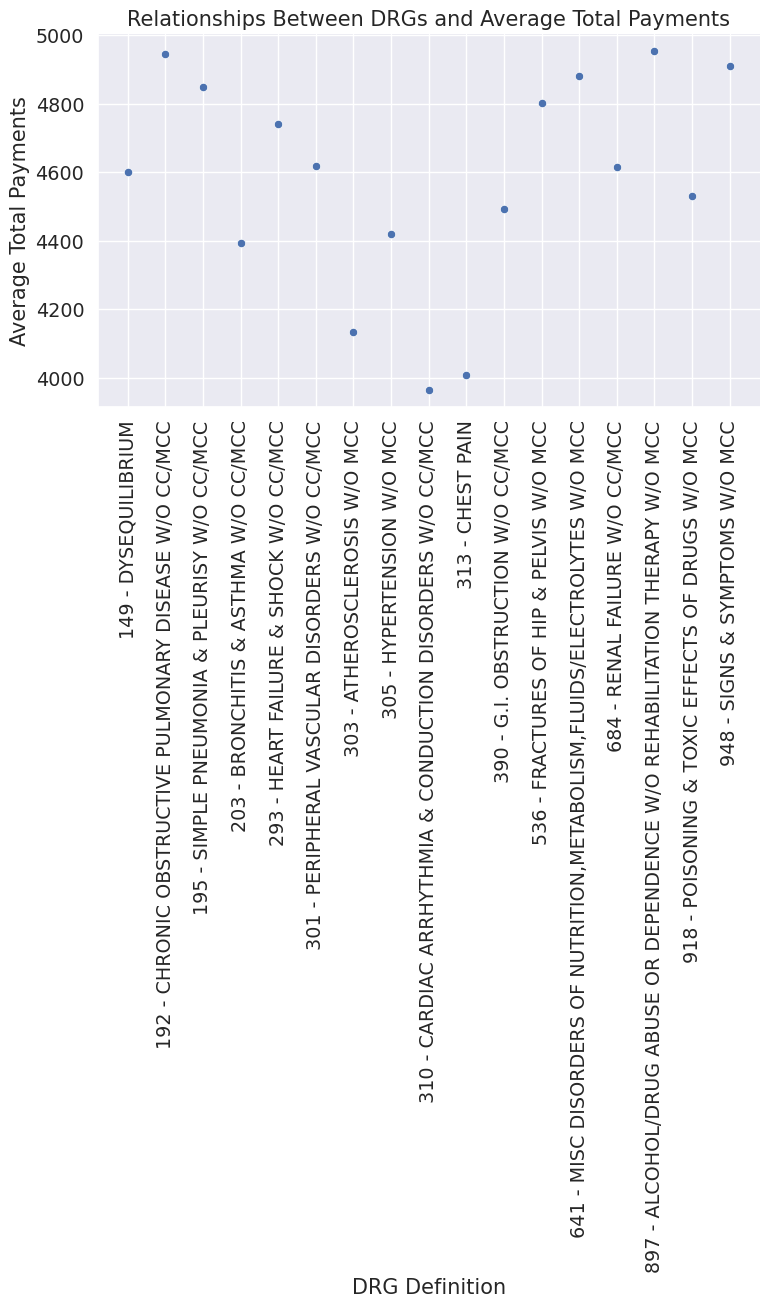

In [ ]:
### pair plot ####
#### numerical and non numerical####
plt.figure(figsize=(15, 10))
g = sns.pairplot(grouped_df, x_vars=['DRG Definition'], y_vars='Average Total Payments', height=5, aspect=2.5)
plt.title("Relationships Between DRGs and Average Total Payments")
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


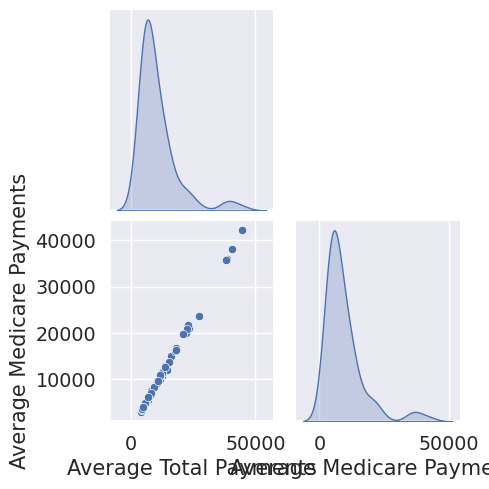

In [ ]:
#pair plots two numerical datas taken ##
numeric_columns = ['Average Total Payments', 'Average Medicare Payments']
sns.pairplot(df[numeric_columns], diag_kind='kde', corner=True)
plt.grid(True)
plt.show()


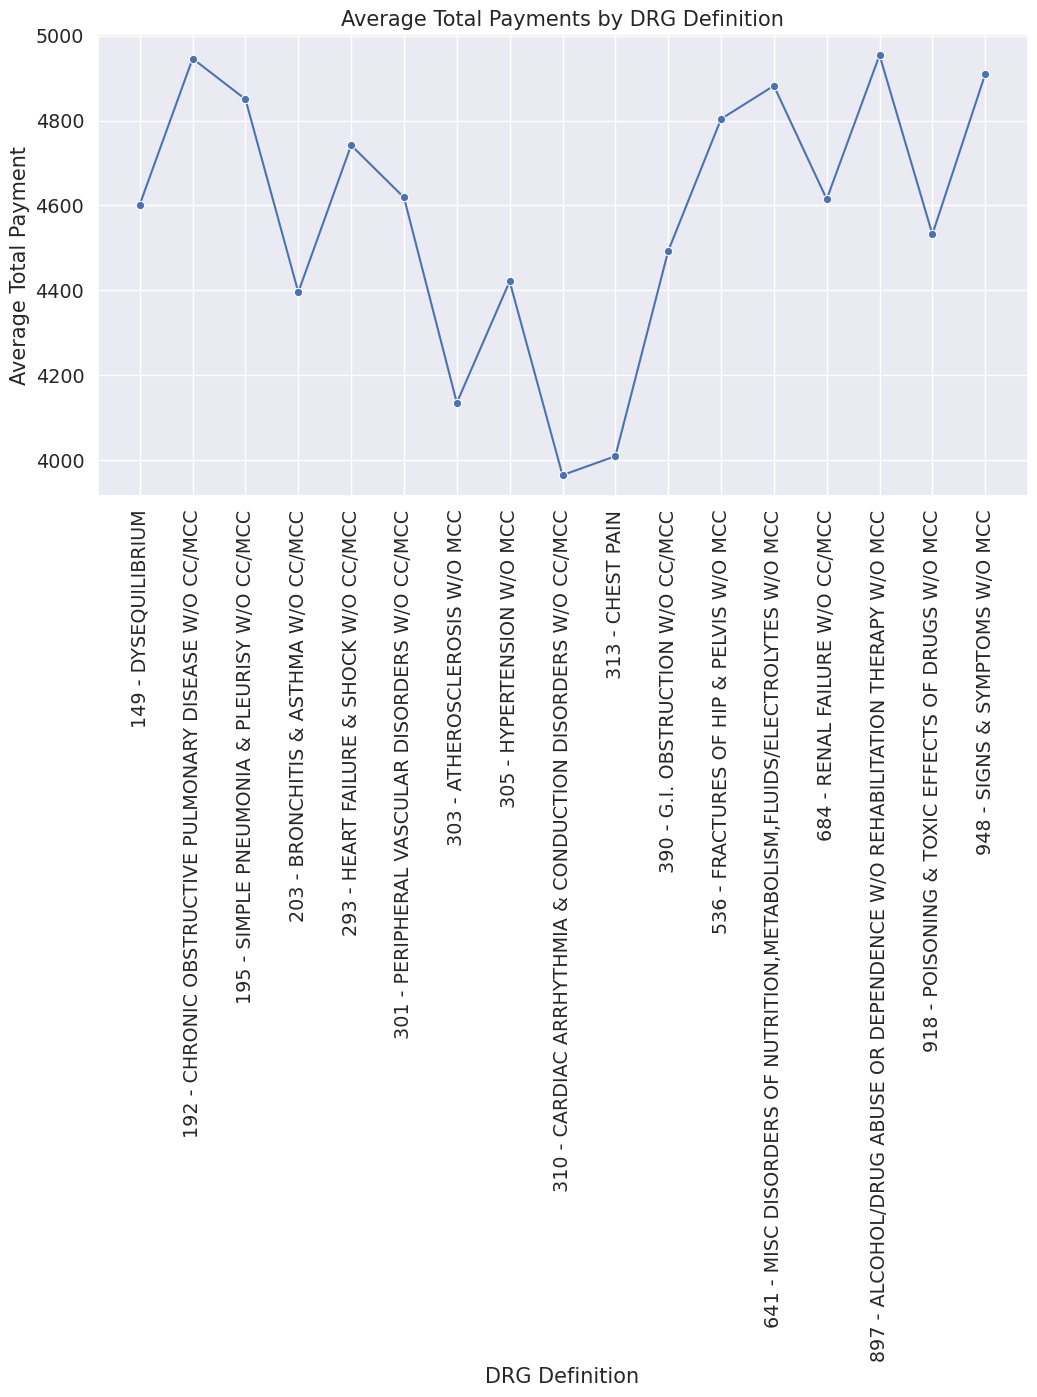

In [ ]:
### line plot #######
plt.figure(figsize=(12, 6))
sns.lineplot(x='DRG Definition', y='Average Total Payments', data=grouped_df, marker='o')
plt.title("Average Total Payments by DRG Definition")
plt.xlabel("DRG Definition")
plt.ylabel("Average Total Payment")
plt.xticks(rotation=90)
plt.show()


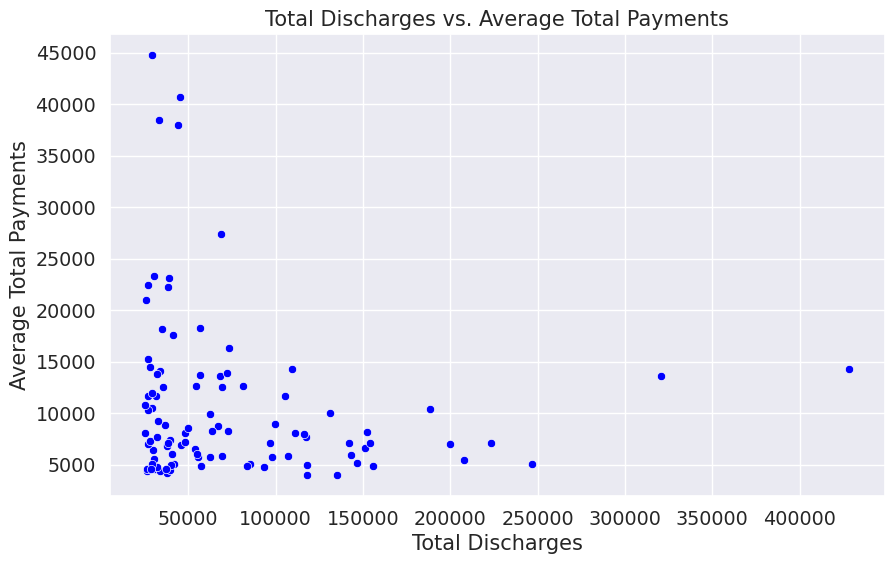

In [ ]:
### scatter plot ###
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Discharges', y='Average Total Payments', data=df, color='blue')
plt.title('Total Discharges vs. Average Total Payments')
plt.xlabel('Total Discharges')
plt.ylabel('Average Total Payments')

plt.grid(True)
plt.show()


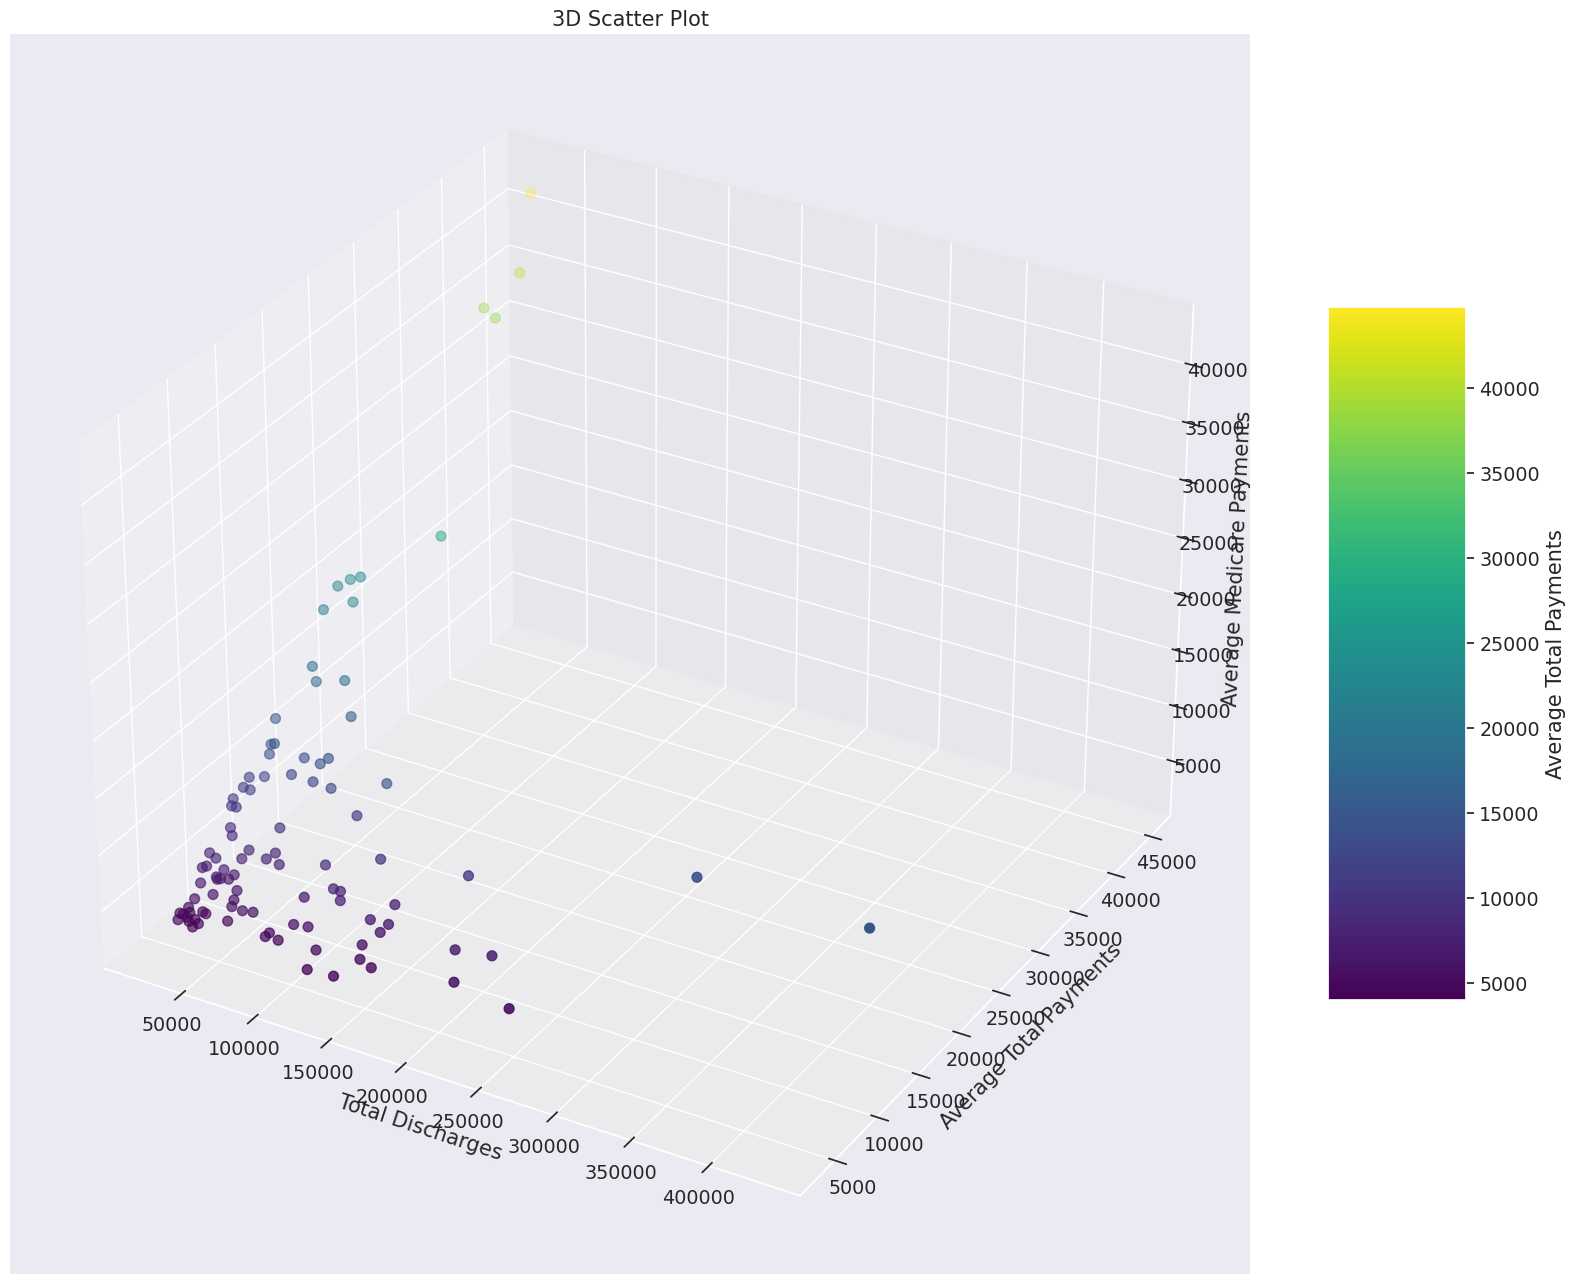

In [ ]:
#### 3d plot ####3
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D Scatter Plot')

scatter = ax.scatter(df['Total Discharges'], df['Average Total Payments'], df['Average Medicare Payments'],
                     c=df['Average Total Payments'], cmap='viridis', s=50)

ax.set_xlabel('Total Discharges')
ax.set_ylabel('Average Total Payments')
ax.set_zlabel('Average Medicare Payments')
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Average Total Payments')
plt.show()
